In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv("input/data_10hz/pose_preds.csv")

/tmp/ipykernel_84151/564078681.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("input/data_10hz/pose_preds.csv")


In [25]:
df["area"] = (df["bbox_x_2"] - df["bbox_x_1"]) * (df["bbox_y_2"] - df["bbox_y_1"]) / (df["width"] * df["height"])
df["min_keypoint_score"] = df[[f"keypoint_score_{i}" for i in range(17)]].min(axis=1)
df["center_x"] = (df["bbox_x_1"] + df["bbox_x_2"]) / 2 / df["width"]
df["center_y"] = (df["bbox_y_1"] + df["bbox_y_2"]) / 2 / df["height"]

In [26]:
df = df[df["bbox_score"] > 0.5]

<Axes: >

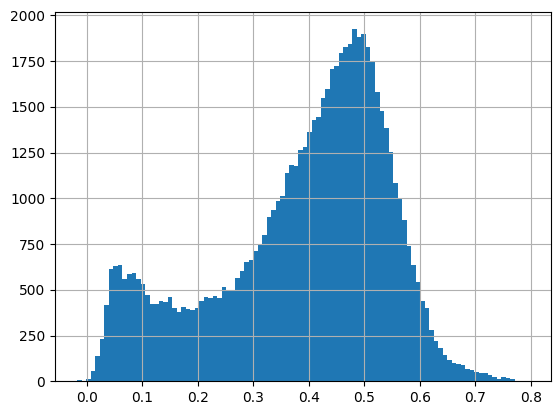

In [27]:
df["min_keypoint_score"].hist(bins=100)

In [28]:
df_filtered = df[(df["min_keypoint_score"] > 0.2) & (df["area"] > 0.0375) & (df["area"] < 0.15)]

In [29]:
a = df_filtered.groupby("frame_filename")["instance_id"].nunique()


In [30]:
frame_filename = a[a==3].index

In [40]:
import itertools
def get_diffs(values):
    # values: Series (1つのグループに属する instance_value)
    # まずソートしておく(しなくてもOKですが、見通しのため)
    sorted_vals = values.sort_values().values
    
    # 全てのペアの組み合わせを生成
    pairs = itertools.combinations(sorted_vals, 2)  # 2つずつの組み合わせ
    # 各ペアの絶対差をリスト化
    diffs = [abs(a - b) for a, b in pairs]

    return pd.Series({
        'closest_diff': min(diffs),   # もっとも近い差
        'farthest_diff': max(diffs), # もっとも遠い差
    })

b = df_filtered[df_filtered["frame_filename"].isin(frame_filename)]
c = b.groupby("frame_filename")["center_y"].apply(get_diffs).reset_index()
closest_diff = c[c["level_1"] == "closest_diff"]["center_y"]
farthest_diff = c[c["level_1"] == "farthest_diff"]["center_y"]

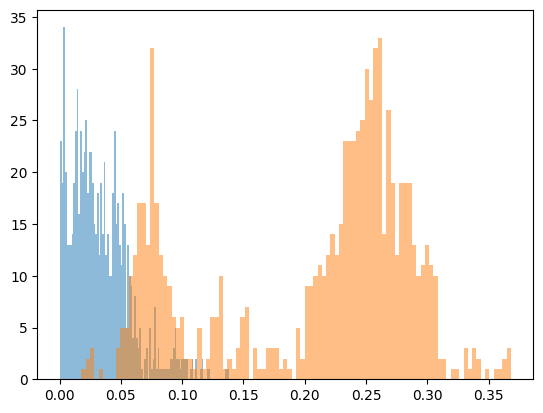

In [44]:
plt.hist(closest_diff, bins=100, alpha=0.5)
plt.hist(farthest_diff, bins=100, alpha=0.5)
plt.show()

In [98]:
len(a), (a == 2).mean()

(13597, 0.7878208428329778)

<Axes: >

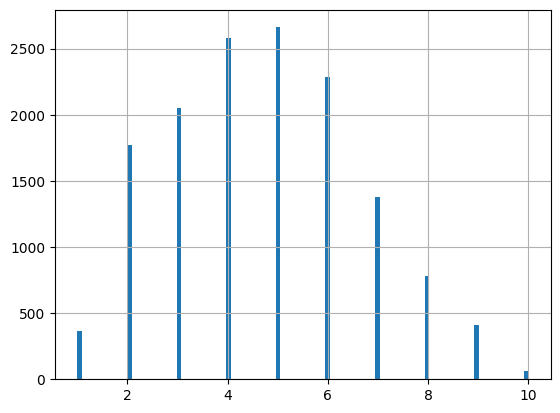

In [92]:
df.groupby("frame_filename")["instance_id"].nunique().hist(bins=100)

In [99]:
b = df.groupby("frame_filename")["instance_id"].nunique()

In [100]:
len(b), (b == 2).mean()

(14348, 0.12329244494006134)

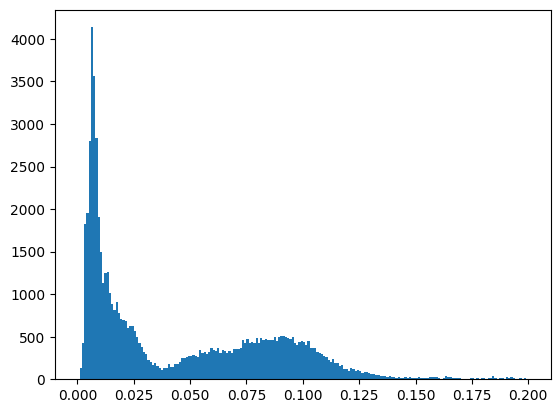

In [102]:
plt.hist(df["area"], bins=200, range=(0, 0.2))
plt.show()
